In [25]:
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


## Data dimensionality, distance-based classifiers
Excercise with mnist digit dataset. Lets first load the data and take a peek:

In [86]:
X_train = pd.read_csv('./data/train_in.csv',header=None)
Y_train = pd.read_csv('./data/train_out.csv',header=None)
df_train = X_train.copy()
df_train['label']=Y_train

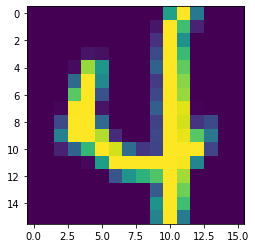

In [87]:
def show_number(nr,data):    
    X=np.array(data)
    X=np.reshape(X[nr,:],(16,16))
    imgplot = plt.imshow(X)
    plt.show()
show_number(2,X_train)

How big is the difference between numbers?

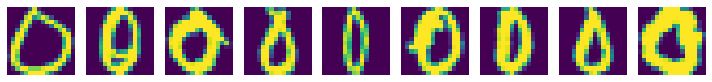

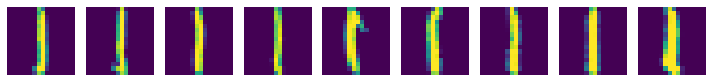

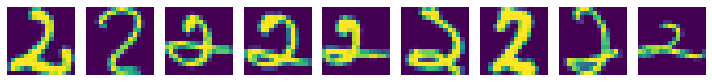

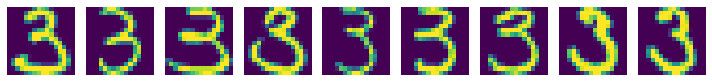

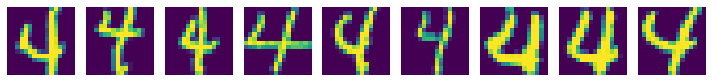

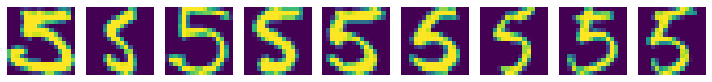

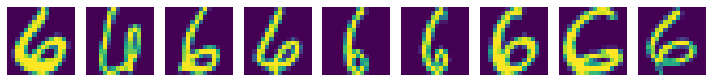

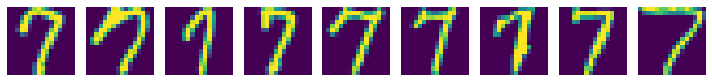

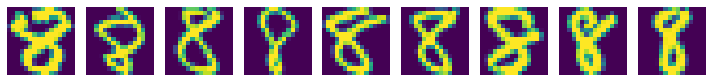

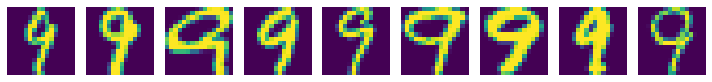

In [77]:
def get_image(nr,data):
    return np.reshape(data[nr,:],(16,16))

def display_multiple_img(images, rows = 3, cols=3):
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(10,10))
    for ind,title in enumerate(images):
        ax.ravel()[ind].imshow(images[title])
        ax.ravel()[ind].set_axis_off()
    plt.tight_layout()
    plt.show()

def display_digits(digit,data,rows,cols):
    total_images = rows*cols
    data=np.array(data.drop('label',axis=1))
    index=X_train.loc[X_train.label==digit].index[:total_images]
    images = {'Image'+str(i):get_image(i,data) for i in index}
    display_multiple_img(images, rows, cols)

    
for i in range(10):
    display_digits(i,X_train,rows=1,cols=9)

For each digit d in range(10) calculate the 'centre': $c_{d}$ as the mean of allcoordinates of vectors constructin $C_{d}$.

In [94]:
c_ds=df_train.groupby('label').mean()
c_ds

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
label,,,,,,,,,,,,,,,,,,,,,
0,-1.000000,-0.997524,-0.987003,-0.945918,-0.844044,-0.604991,-0.141621,0.161361,0.082251,-0.342887,...,0.289508,0.542160,0.444213,0.022950,-0.507881,-0.850539,-0.976881,-0.998734,-1.000000,-1.000000
1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.996972,-0.661611,0.510294,0.030044,-0.901274,...,-0.849389,0.166083,0.553520,-0.593107,-0.979258,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2,-0.986797,-0.941292,-0.876579,-0.804203,-0.629980,-0.406213,-0.242248,-0.191307,-0.360149,-0.674030,...,-0.530079,-0.679812,-0.783594,-0.844733,-0.850465,-0.825832,-0.773213,-0.775074,-0.851668,-0.948465
3,-1.000000,-0.989557,-0.917977,-0.728794,-0.378145,-0.045748,0.235366,0.424603,0.419053,0.123260,...,0.333496,0.378382,0.262832,-0.004893,-0.308008,-0.592107,-0.795198,-0.925282,-0.979122,-0.999473
4,-1.000000,-1.000000,-1.000000,-0.984016,-0.910434,-0.855426,-0.918049,-0.863639,-0.781008,-0.729377,...,-0.861836,-0.590828,-0.334426,-0.278828,-0.600361,-0.778877,-0.926730,-0.979664,-0.989631,-1.000000
5,-1.000000,-0.994852,-0.980898,-0.931909,-0.840636,-0.775227,-0.623273,-0.460739,-0.328909,-0.154477,...,0.110511,0.243409,0.225500,0.079545,-0.225330,-0.550636,-0.784170,-0.906341,-0.971966,-0.997909
6,-1.000000,-1.000000,-1.000000,-1.000000,-0.997404,-0.964040,-0.875828,-0.546066,-0.055894,-0.080397,...,0.374391,0.473755,0.250139,-0.195086,-0.643828,-0.870583,-0.962073,-0.993026,-1.000000,-1.000000
7,-0.985030,-0.900476,-0.777145,-0.619380,-0.434488,-0.279331,-0.208434,-0.189855,-0.090145,0.016741,...,-0.321090,0.106663,-0.236711,-0.793783,-0.955452,-0.997494,-1.000000,-1.000000,-1.000000,-1.000000
8,-0.999285,-0.974076,-0.917743,-0.822118,-0.617340,-0.278667,0.177389,0.386562,0.290319,-0.085993,...,0.050521,0.531792,0.582271,0.103076,-0.547979,-0.875514,-0.972472,-0.993299,-0.999986,-1.000000


Next, calculate the distances between the centers of the 10 clouds, $dist_{ij} = dist(c_{i}; c_{j} )$, for
$i,j = 0,1,...9$.

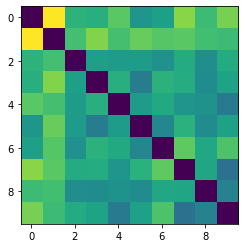

In [120]:
from itertools import product
dist_ij=np.zeros((10,10))
for i,j in product(range(10),range(10)):
    #if j>=i:
    dist_ij[i,j]=np.linalg.norm(c_ds.iloc[i].values-c_ds.iloc[j].values)
imgplot = plt.imshow(dist_ij)
plt.show()

Given all these distances, try to say something about the expected accuracy of your
classifier. What pairs of digits seem to be most difficult to separate?